In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import os
pd.set_option('display.max_columns', 300)

In [2]:
#Grilled chickenを読み込むときdateのカラムは存在しない
#origin_data = pd.read_csv("2017_katudon_takizawa.csv")
#origin_data = pd.read_csv("2017_nikomikatu.csv")
origin_data = pd.read_csv("2017_Grilled chicken.csv")
#origin_data = pd.read_csv("Grilled chicken_3year.csv")

In [3]:
#origin_data.sort_values("")

In [4]:
origin_data=origin_data.fillna(0)

In [5]:
#売り切れで売れていないのをNAN商品があって売れてないのは0
for index,row in origin_data.iterrows():        
    if row.six_urisuu==0:
              if row.seven_urisuu==0 and row.eight_urisuu==0 and row.pm_nine_urisuu==0 and row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0:
                     origin_data.at[index,'six_urisuu'] =np.nan                             
    if row.seven_urisuu==0:  
              if  row.eight_urisuu==0 and row.pm_nine_urisuu==0 and row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0 :
                     origin_data.at[index,'seven_urisuu'] =np.nan                        
    if row.eight_urisuu==0:
              if  row.pm_nine_urisuu==0 and row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0 :
                     origin_data.at[index,'eight_urisuu'] =np.nan                     
    if row.pm_nine_urisuu==0:
              if row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0 :
                     origin_data.at[index,'pm_nine_urisuu'] =np.nan                     
    if row.pm_ten_urisuu==0:
              if row.pm_eleve_urisuu ==0:
                    origin_data.at[index,'pm_ten_urisuu'] =np.nan                    
    if row.pm_eleve_urisuu==0:     
         origin_data.at[index,'pm_eleve_urisuu']=np.nan                                  

In [6]:
#2017_Grilled chicken.csvを読み込む場合
origin_data.drop(348,inplace=True)
#2017_katudon_takizawa.csv
#origin_data.drop(348,inplace=True)

In [7]:
origin_data2=pd.DataFrame()

In [8]:
#時間別平均価格を作る
def avg_price(str1,str2,str3):
     origin_data2[str1]=origin_data[str2]/origin_data[str3]
        
avg_price('discount9','nine_urikin','nine_urisuu')
avg_price('discount10','ten_urikin','ten_urisuu')
avg_price('discount11','eleven_urikin','eleven_urisuu')
avg_price('discount0','noon_urikin','noon_urisuu')
avg_price('discount1','one_urikin','one_urisuu')
avg_price('discount2','two_urikin','two_urisuu')
avg_price('discount3','three_urikin','three_urisuu')
avg_price('discount4','four_urikin','four_urisuu')
avg_price('discount5','five_urikin','five_urisuu')
avg_price('discount6','six_urikin','six_urisuu')
avg_price('discount7','seven_urikin','seven_urisuu')
avg_price('discount8','eight_urikin','eight_urisuu')
avg_price('discount9_pm','pm_nine_urikin','pm_nine_urisuu')
avg_price('discount10_pm','pm_ten_urikin','pm_ten_urisuu')
avg_price('discount11_pm','pm_eleven_urikin','pm_eleve_urisuu')

In [9]:
origin_data2

,discount9,discount10,discount11,discount0,discount1,discount2,discount3,discount4,discount5,discount6,discount7,discount8,discount9_pm,discount10_pm,discount11_pm
0,NaN,449.333333,355.333333,NaN,298.000000,488.666667,525.333333,616.142857,486.750000,225.000000,341.750000,56.000000,NaN,NaN,NaN
1,NaN,298.000000,486.000000,298.000000,509.500000,368.500000,594.750000,423.333333,387.200000,421.857143,555.000000,588.000000,NaN,NaN,NaN
2,439.000000,580.000000,439.000000,458.666667,368.500000,539.000000,512.222222,536.428571,329.500000,422.444444,NaN,NaN,490.000000,NaN,NaN
3,NaN,261.333333,341.000000,NaN,313.500000,243.000000,305.750000,439.000000,322.571429,282.000000,188.500000,140.625000,149.000000,119.000000,NaN
4,NaN,243.000000,243.000000,261.333333,NaN,270.500000,313.500000,224.666667,208.333333,312.285714,437.333333,238.000000,NaN,NaN,NaN
5,298.000000,261.333333,NaN,439.000000,188.000000,384.000000,224.666667,449.333333,298.000000,241.333333,298.000000,264.666667,156.000000,99.187500,NaN
6,336.000000,280.000000,245.714286,246.000000,388.000000,460.000000,254.500000,317.333333,550.000000,289.750000,321.428571,NaN,125.666667,NaN,NaN
7,NaN,355.333333,290.000000,261.333333,486.000000,392.000000,367.555556,387.428571,382.800000,278.000000,201.250000,254.666667,171.000000,108.000000,102.500000
8,188.000000,580.000000,388.800000,254.000000,261.333333,286.000000,261.333333,292.000000,357.777778,243.250000,178.000000,348.000000,139.250000,94.000000,NaN
9,188.000000,188.000000,298.000000,224.666667,188.000000,298.000000,580.000000,355.333333,283.000000,286.000000,286.666667,369.333333,157.000000,NaN,NaN


In [10]:
def discount_graph(str):
    origin_data[str].value_counts().plot.bar(figsize=(15, 3), color='darkblue')
#discount_graph('discount9')
#discount_graph('discount8')

In [11]:
#時間別売り上げ個数以外は削除
origin_data=origin_data.drop(["SKUcode","item","nesage","urikin","nine_nesage","ten_nesage","eleven_nesage","noon_nesage",\
                              "one_nesage","two_nesage","three_nesage","four_nesage","five_nesage","six_nesage","seven_nesage",\
                              "eight_nesage","pm_nine_nesage","pm_ten_nesage","pm_eleven_nesage"],axis=1)

In [12]:
origin_data

,youbi,urisuu,nine_urisuu,nine_urikin,ten_urisuu,ten_urikin,eleven_urisuu,eleven_urikin,noon_urisuu,noon_urikin,one_urisuu,one_urikin,two_urisuu,two_urikin,three_urisuu,three_urikin,four_urisuu,four_urikin,five_urisuu,five_urikin,six_urisuu,six_urikin,seven_urisuu,seven_urikin,eight_urisuu,eight_urikin,pm_nine_urisuu,pm_nine_urikin,pm_ten_urisuu,pm_ten_urikin,pm_eleve_urisuu,pm_eleven_urikin,weather,avg_temp,youbi.1
0,2017年01月01日(日),40.0,0.0,0.0,3.0,1348.0,3.0,1066.0,0.0,0.0,1.0,298.0,3.0,1466.0,3.0,1576.0,7.0,4313.0,12.0,5841.0,3.0,675.0,4.0,1367.0,1.0,56.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,3.4,日
1,2017年01月02日(月),47.0,0.0,0.0,2.0,596.0,3.0,1458.0,2.0,596.0,4.0,2038.0,4.0,1474.0,8.0,4758.0,9.0,3810.0,5.0,1936.0,7.0,2953.0,2.0,1110.0,1.0,588.0,NaN,0.0,NaN,0.0,NaN,0.0,4.5,5.1,月
2,2017年01月03日(火),64.0,2.0,878.0,1.0,580.0,2.0,878.0,6.0,2752.0,4.0,1474.0,8.0,4312.0,9.0,4610.0,14.0,7510.0,8.0,2636.0,9.0,3802.0,0.0,0.0,0.0,0.0,1.0,490.0,NaN,0.0,NaN,0.0,4.5,4.0,火
3,2017年01月04日(水),48.0,0.0,0.0,3.0,784.0,4.0,1364.0,0.0,0.0,4.0,1254.0,2.0,486.0,8.0,2446.0,4.0,1756.0,7.0,2258.0,4.0,1128.0,2.0,377.0,8.0,1125.0,1.0,149.0,1.0,119.0,NaN,0.0,12.0,2.1,水
4,2017年01月05日(木),35.0,0.0,0.0,2.0,486.0,4.0,972.0,3.0,784.0,0.0,0.0,4.0,1082.0,4.0,1254.0,3.0,674.0,3.0,625.0,7.0,2186.0,3.0,1312.0,2.0,476.0,NaN,0.0,NaN,0.0,NaN,0.0,4.5,0.3,木
5,2017年01月06日(金),51.0,1.0,298.0,3.0,784.0,0.0,0.0,2.0,878.0,1.0,188.0,2.0,768.0,3.0,674.0,3.0,1348.0,2.0,596.0,6.0,1448.0,3.0,894.0,3.0,794.0,5.0,780.0,16.0,1587.0,NaN,0.0,0.0,0.3,金
6,2017年01月07日(土),66.0,3.0,1008.0,5.0,1400.0,7.0,1720.0,3.0,738.0,5.0,1940.0,3.0,1380.0,4.0,1018.0,9.0,2856.0,1.0,550.0,4.0,1159.0,7.0,2250.0,0.0,0.0,15.0,1885.0,NaN,0.0,NaN,0.0,-1.0,1.5,土
7,2017年01月08日(日),73.0,0.0,0.0,3.0,1066.0,6.0,1740.0,3.0,784.0,3.0,1458.0,3.0,1176.0,9.0,3308.0,7.0,2712.0,5.0,1914.0,3.0,834.0,4.0,805.0,3.0,764.0,8.0,1368.0,8.0,864.0,8.0,820.0,0.5,3.0,日
8,2017年01月09日(月),63.0,2.0,376.0,2.0,1160.0,5.0,1944.0,5.0,1270.0,3.0,784.0,8.0,2288.0,3.0,784.0,8.0,2336.0,9.0,3220.0,4.0,973.0,1.0,178.0,1.0,348.0,8.0,1114.0,3.0,282.0,NaN,0.0,13.0,2.4,月
9,2017年01月10日(火),33.0,1.0,188.0,1.0,188.0,1.0,298.0,3.0,674.0,1.0,188.0,2.0,596.0,1.0,580.0,3.0,1066.0,2.0,566.0,8.0,2288.0,3.0,860.0,3.0,1108.0,4.0,628.0,NaN,0.0,NaN,0.0,4.5,3.7,火


In [13]:
#平均価格のデータがない場合は0を代入
origin_data2['discount0'].fillna(498,inplace=True)
origin_data2['discount1'].fillna(0,inplace=True)
origin_data2['discount2'].fillna(0,inplace=True)
origin_data2['discount3'].fillna(0,inplace=True)
origin_data2['discount4'].fillna(0,inplace=True)
origin_data2['discount5'].fillna(0,inplace=True)
origin_data2['discount6'].fillna(0,inplace=True)
origin_data2['discount7'].fillna(0,inplace=True)
origin_data2['discount8'].fillna(0,inplace=True)
origin_data2['discount9'].fillna(498,inplace=True)
origin_data2['discount10'].fillna(498,inplace=True)
origin_data2['discount11'].fillna(498,inplace=True)
origin_data2['discount9_pm'].fillna(0,inplace=True)
origin_data2['discount10_pm'].fillna(0,inplace=True)
origin_data2['discount11_pm'].fillna(0,inplace=True)
#print(origin_data['discount0'])

In [14]:
### 要相談
#平均価格のデータがないセルの埋め方
#発生する原因　売れた個数と金額から平均価格を算出しているから１つも売れない(またはそもそも売っていないと)とどちらも0になるから平均価格もわかない

ave9=(origin_data2['discount9']+origin_data2['discount9'])/2
ave10=(origin_data2['discount9']+origin_data2['discount11'])/2
ave11=(origin_data2['discount10']+origin_data2['discount0'])/2
ave12=(origin_data2['discount11']+origin_data2['discount1'])/2
ave1=(origin_data2['discount0']+origin_data2['discount2'])/2
ave2=(origin_data2['discount1']+origin_data2['discount3'])/2
ave3=(origin_data2['discount2']+origin_data2['discount4'])/2
ave4=(origin_data2['discount3']+origin_data2['discount5'])/2
ave5=(origin_data2['discount4']+origin_data2['discount6'])/2
ave6=(origin_data2['discount5']+origin_data2['discount7'])/2
ave7=(origin_data2['discount6']+origin_data2['discount8'])/2
ave8=(origin_data2['discount7']+origin_data2['discount9_pm'])/2
ave9_pm=(origin_data2['discount8']+origin_data2['discount10_pm'])/2
ave10_pm=(origin_data2['discount9_pm']+origin_data2['discount11_pm'])/2
ave11_pm=(origin_data2['discount11_pm']+origin_data2['discount11_pm'])/2

In [15]:
aved = pd.DataFrame({ 
    'avg9':ave9,
    'avg10':ave10,
    'avg11':ave11,
    'avg12':ave12,
    'avg1':ave1,
    'avg2':ave2,
    'avg3':ave3,
    'avg4':ave4,
    'avg5':ave5, 
    'avg6':ave6,
    'avg7':ave7,
    'avg8':ave8,
    'avg9_pm':ave9_pm,
    'avg10_pm':ave10_pm,
    'avg11_pm':ave11_pm,
}) 

In [16]:
aved=aved.ix[:,['avg9','avg10','avg11','avg12','avg1','avg2','avg3','avg4','avg5','avg6','avg7','avg8','avg9_pm','avg10_pm','avg11_pm']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [17]:
#aved

In [18]:
for index,row in origin_data2.iterrows(): 
    if row.discount1==0:
                    origin_data2.at[index,'discount1']=aved.at[index,'avg1']
    if row.discount2==0:
                     origin_data2.at[index,'discount2'] =aved.at[index,'avg2']                          
    if row.discount3==0:  
                    origin_data2.at[index,'discount3'] =aved.at[index,'avg3']                    
    if row.discount4==0:
                   origin_data2.at[index,'discount4'] =aved.at[index,'avg4']
    if row.discount5==0:
                    origin_data2.at[index,'discount5']=aved.at[index,'avg5']
    if row.discount6==0:
                     origin_data2.at[index,'discount6'] =aved.at[index,'avg6']                          
    if row.discount7==0:  
                    origin_data2.at[index,'discount7'] =aved.at[index,'avg7']                    
    if row.discount8==0:
                   origin_data2.at[index,'discount8'] =aved.at[index,'avg8']
    if row.discount9_pm==0:
                    origin_data2.at[index,'discount9_pm']=aved.at[index,'avg9_pm']
    if row.discount10_pm==0:
                     origin_data2.at[index,'discount10_pm'] =aved.at[index,'avg10_pm']  

In [19]:
origin_data2=origin_data2.T

In [20]:
origin_data2=pd.melt(origin_data2)

In [21]:
origin_data2.drop("variable",inplace=True,axis=1)

In [22]:
origin_data2=origin_data2.rename(columns={"value":"price"})

In [23]:
#あぶり焼き
origin_data["youbi"]=origin_data["youbi"].astype("str")
#カツ丼弁当
#origin_data.rename(columns={"youbi":"week"},inplace=True)
#origin_data.rename(columns={"date":"youbi"},inplace=True)
#origin_data.drop(["month","week"],axis=1,inplace=True)

In [24]:
#日付をdatetimeにするために不要の部分を取り除く
origin_data["youbi"]=origin_data["youbi"].apply(lambda x: x.replace(')','').replace('(','').replace('日','').replace('月','').replace('年',''))
origin_data["youbi"]=origin_data["youbi"].apply(lambda x: x.replace('火','').replace('水','').replace('木','').replace('金','').replace('土',''))
#あぶり焼きチキン１年分の時
origin_data["datetime"]=pd.to_datetime(origin_data["youbi"],format='%Y%m%d')
#カツ丼のとき
#origin_data["datetime"]=pd.to_datetime(origin_data["youbi"],format='%Y%m%d')
#origin_data.drop("youbi",axis=1,inplace=True)

In [25]:
origin_data.head()

,youbi,urisuu,nine_urisuu,nine_urikin,ten_urisuu,ten_urikin,eleven_urisuu,eleven_urikin,noon_urisuu,noon_urikin,one_urisuu,one_urikin,two_urisuu,two_urikin,three_urisuu,three_urikin,four_urisuu,four_urikin,five_urisuu,five_urikin,six_urisuu,six_urikin,seven_urisuu,seven_urikin,eight_urisuu,eight_urikin,pm_nine_urisuu,pm_nine_urikin,pm_ten_urisuu,pm_ten_urikin,pm_eleve_urisuu,pm_eleven_urikin,weather,avg_temp,youbi.1,datetime
0,20170101,40.0,0.0,0.0,3.0,1348.0,3.0,1066.0,0.0,0.0,1.0,298.0,3.0,1466.0,3.0,1576.0,7.0,4313.0,12.0,5841.0,3.0,675.0,4.0,1367.0,1.0,56.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,3.4,日,2017-01-01
1,20170102,47.0,0.0,0.0,2.0,596.0,3.0,1458.0,2.0,596.0,4.0,2038.0,4.0,1474.0,8.0,4758.0,9.0,3810.0,5.0,1936.0,7.0,2953.0,2.0,1110.0,1.0,588.0,NaN,0.0,NaN,0.0,NaN,0.0,4.5,5.1,月,2017-01-02
2,20170103,64.0,2.0,878.0,1.0,580.0,2.0,878.0,6.0,2752.0,4.0,1474.0,8.0,4312.0,9.0,4610.0,14.0,7510.0,8.0,2636.0,9.0,3802.0,0.0,0.0,0.0,0.0,1.0,490.0,NaN,0.0,NaN,0.0,4.5,4.0,火,2017-01-03
3,20170104,48.0,0.0,0.0,3.0,784.0,4.0,1364.0,0.0,0.0,4.0,1254.0,2.0,486.0,8.0,2446.0,4.0,1756.0,7.0,2258.0,4.0,1128.0,2.0,377.0,8.0,1125.0,1.0,149.0,1.0,119.0,NaN,0.0,12.0,2.1,水,2017-01-04
4,20170105,35.0,0.0,0.0,2.0,486.0,4.0,972.0,3.0,784.0,0.0,0.0,4.0,1082.0,4.0,1254.0,3.0,674.0,3.0,625.0,7.0,2186.0,3.0,1312.0,2.0,476.0,NaN,0.0,NaN,0.0,NaN,0.0,4.5,0.3,木,2017-01-05


In [26]:
urisuu_data2017=origin_data[["datetime","nine_urisuu","ten_urisuu","eleven_urisuu","noon_urisuu"\
                         ,"one_urisuu","two_urisuu","three_urisuu","four_urisuu"\
                         ,"five_urisuu","six_urisuu","seven_urisuu","eight_urisuu",\
                         "pm_nine_urisuu","pm_ten_urisuu","pm_eleve_urisuu"]]

In [27]:
urisuu_data2017.set_index("datetime",inplace=True,drop=True)

In [28]:
urisuu_data2017=urisuu_data2017.T

In [29]:
urisuu_data2017=pd.melt(urisuu_data2017)

In [30]:
urisuu_data2017

,datetime,value
0,2017-01-01,0.0
1,2017-01-01,3.0
2,2017-01-01,3.0
3,2017-01-01,0.0
4,2017-01-01,1.0
5,2017-01-01,3.0
6,2017-01-01,3.0
7,2017-01-01,7.0
8,2017-01-01,12.0
9,2017-01-01,3.0


In [31]:
#iの添え字を変更indexに
import datetime
#3年の場合
#for i in range(0,6195):
#1年の場合
for i in range(0,5220):
    k=i
    i=i%15+9
    urisuu_data2017.at[urisuu_data2017.index[k],"datetime"]=urisuu_data2017.at[urisuu_data2017.index[k],"datetime"]+datetime.timedelta(hours=i) 

In [32]:
#,時間月、曜日、第何週目かを新たにmonth,youbi,weekofyearとして作る
urisuu_data2017["hour"]=urisuu_data2017["datetime"].dt.hour
urisuu_data2017["month"]=urisuu_data2017["datetime"].dt.month
urisuu_data2017["youbi"]=urisuu_data2017["datetime"].dt.dayofweek
urisuu_data2017["youbi"]=urisuu_data2017["youbi"].astype("str")
urisuu_data2017["month"]=urisuu_data2017["month"].astype("str")
urisuu_data2017["hour"]=urisuu_data2017["hour"].astype("str")
urisuu_data2017["weekofyear"]=urisuu_data2017["datetime"].dt.weekofyear
urisuu_data2017.loc[urisuu_data2017.index <= 14, 'weekofyear'] = 1

In [33]:
urisuu_data2017.rename(columns={"value":"uri_su"},inplace=True)

In [34]:
#origin_data2は１時間毎の平均価格が格納
urisuu_data2017=pd.concat([urisuu_data2017,origin_data2],axis=1)

In [35]:
#曜日変数と月変数,時間をダミー変数で置き換える
weekday_dummy = pd.get_dummies(urisuu_data2017[['youbi','month',"hour"]], drop_first = False)
#print(weekday_dummy)
urisuu_data2017 = pd.concat([urisuu_data2017, weekday_dummy],axis=1)
#origin_data.head()

In [36]:
#日付順に並び替え
urisuu_data2017.sort_values("datetime",inplace=True)

In [37]:
os.chdir('/Users/watanabeyui/aoi_analytics/Past_weather_data_hourly_snow')
os.getcwd()

'/Users/watanabeyui/aoi_analytics/Past_weather_data_hourly_snow'

In [38]:
import glob
files = glob.glob("*.csv")#フォルダ内の全てのCSVファイルを取得
print(files)

['2017_3_22.csv', '2017_12_14.csv', '2016_3_22.csv', '2017_4_17.csv', '2017_5_2.csv', '2016_4_17.csv', '2016_7_5.csv', '2017_12_28.csv', '2016_5_7.csv', '2016_3_1.csv', '2017_1_6.csv', '2016_8_17.csv', '2017_1_27.csv', '2017_10_11.csv', '2016_1_27.csv', '2016_11_26.csv', '2017_8_17.csv', '2016_1_3.csv', '2017_6_12.csv', '2017_3_4.csv', '2016_6_12.csv', '2017_3_5.csv', '2016_6_13.csv', '2017_6_13.csv', '2016_1_2.csv', '2017_8_16.csv', '2016_11_27.csv', '2016_1_26.csv', '2017_10_10.csv', '2017_1_26.csv', '2016_8_16.csv', '2017_1_7.csv', '2016_5_6.csv', '2017_7_1.csv', '2016_4_16.csv', '2017_12_29.csv', '2016_7_4.csv', '2017_5_3.csv', '2017_4_16.csv', '2016_3_23.csv', '2017_12_15.csv', '2017_3_23.csv', '2016_9_9.csv', '2017_12_17.csv', '2016_3_21.csv', '2016_4_28.csv', '2017_3_21.csv', '2017_4_28.csv', '2016_7_6.csv', '2016_4_14.csv', '2017_4_14.csv', '2017_5_1.csv', '2016_5_4.csv', '2017_7_3.csv', '2017_1_5.csv', '2016_3_2.csv', '2017_1_30.csv', '2017_10_12.csv', '2016_1_24.csv', '2016_1

In [39]:
weather_tb = pd.DataFrame()
for file in files:
    t = pd.read_csv(file)
    weather_tb = pd.concat([weather_tb, t])#横方向への結合なのでaxis=1を指定

In [40]:
weather_tb["date"]=pd.to_datetime(weather_tb["date"],format="%Y年%m月%d日%H時")
weather_tb.reset_index(inplace=True,drop=True)

In [41]:
weather_tb.sort_values('date',inplace=True)

In [42]:
weather_tb.columns=["date","weather","avg_temp","snow","sekisetu"]

In [43]:
weather_tb=weather_tb.replace("--",0)
weather_tb["weather"]=weather_tb["weather"].replace("\)","")
weather_tb["snow"]=weather_tb["snow"].replace("×","0")
weather_tb["sekisetu"]=weather_tb["sekisetu"].replace("×","0")

In [44]:
print(weather_tb.dtypes)

date        datetime64[ns]
weather             object
avg_temp            object
snow                object
sekisetu            object
dtype: object


In [45]:
pd.set_option('display.max_rows', 5000)
weather_tb["snow"]=weather_tb["snow"].astype(float)
weather_tb["sekisetu"]=weather_tb["sekisetu"].astype(float)
weather_tb["weather"]=weather_tb["weather"].astype(str)

In [46]:
print(weather_tb.dtypes)

date        datetime64[ns]
weather             object
avg_temp            object
snow               float64
sekisetu           float64
dtype: object


In [47]:
weather_tb["weather"]=weather_tb['weather'].apply(lambda x: x.replace('.',''))

In [48]:
weather_tb["weather"]=weather_tb['weather'].apply(lambda x: x.replace(')',''))

In [49]:
weather_tb["weather"]=weather_tb["weather"].astype(float)

In [50]:
weather_tb["weather"]=weather_tb["weather"].astype(float)

In [51]:
#import seaborn as sns
#sns.set()
#sns.jointplot(x=weather_tb["weather"],y=origin_data["six_urisuu"],data=origin_data,color="green")

In [52]:
#sns.jointplot(x=origin_data["avg_temp"],y=origin_data["six_urisuu"],data=origin_data,color="green")

In [53]:
print(weather_tb.dtypes)

date        datetime64[ns]
weather            float64
avg_temp            object
snow               float64
sekisetu           float64
dtype: object


In [54]:
weather_tb.reset_index(inplace=True,drop=True)

In [55]:
weather_tb=weather_tb.rename(columns={"date":"datetime"})

In [56]:
#weather_tb

In [57]:
#天気データのdirに移動して、加工データとマージする
origin_data=pd.merge(urisuu_data2017,weather_tb,on="datetime")

In [58]:
origin_data.head()

,datetime,uri_su,hour,month,youbi,weekofyear,price,youbi_0,youbi_1,youbi_2,youbi_3,youbi_4,youbi_5,youbi_6,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_9,weather,avg_temp,snow,sekisetu
0,2017-01-01 09:00:00,0.0,9,1,6,1,498.000000,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,2.7,0.0,0.0
1,2017-01-01 10:00:00,3.0,10,1,6,1,449.333333,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.4,0.0,0.0
2,2017-01-01 11:00:00,3.0,11,1,6,1,355.333333,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0.0,0.0
3,2017-01-01 12:00:00,0.0,12,1,6,1,498.000000,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0.0,0.0
4,2017-01-01 13:00:00,1.0,13,1,6,1,298.000000,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,6.4,0.0,0.0


In [59]:
os.chdir('/Users/watanabeyui/aoi_analytics/')
origin_data.columns

Index(['datetime', 'uri_su', 'hour', 'month', 'youbi', 'weekofyear', 'price',
       'youbi_0', 'youbi_1', 'youbi_2', 'youbi_3', 'youbi_4', 'youbi_5',
       'youbi_6', 'month_1', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_9', 'weather', 'avg_temp',
       'snow', 'sekisetu'],
      dtype='object')

In [60]:
origin_data.rename(columns={"youbi_0":"youbi_月","youbi_1":"youbi_火","youbi_2":"youbi_水",\
                            "youbi_3":"youbi_木","youbi_4":"youbi_金","youbi_5":"youbi_土",\
                            "youbi_6":"youbi_日"},inplace=True)

In [61]:
origin_data["avg_temp"]=origin_data["avg_temp"].astype("float64")

In [62]:
#origin_data.query('month=="2"')

In [73]:
import matplotlib.dates as mdates
#週に分けて回帰分析
#あぶり焼きチキン
for i in range(1,53):
#カツ丼の場合
#for i in range(1,52):
#月に分けて回帰分析
#for i in range(1,13):
#曜日に分けて回帰分析
#for i in range(0,6):
#時間に分けて回帰分析する
#for i in range(9,24):
#直近1ヶ月分を曜日ごとに区切って回帰分析をする
#i=month,j=youbi
#for i in range(1,13):
    #for j in range(0,7):
    #あぶり焼きチキンは46週目のデータがない
    if i!=46:
        #カツ丼は52週目のデータがない
        #if i!=52:
        #i=str(i)
        #j=str(j)
        #週に分けて回帰分析する
        df=origin_data.query('weekofyear==@i')
        #月に分けて回帰分析する
        #df = origin_data[origin_data['month']==i]
        #曜日に分けて回帰分析する
        #df = origin_data[origin_data['youbi']==i]
        #時間に分けて回帰分析する
        #df = origin_data[origin_data['hour']==i]
        #曜日と月に分けて回帰分析
        #df = origin_data[(origin_data['month']==i) & (origin_data["youbi"]==j)
        lm_urisuu=smf.ols("uri_su~price+youbi_日+youbi_月+youbi_木+youbi_水+youbi_火+youbi_金+youbi_土+\
        +weather+avg_temp+snow+hour_9+hour_10+hour_11+hour_12+hour_13+hour_14+hour_15+hour_16+\
        hour_17+hour_18+hour_19+hour_20+hour_21+hour_22+hour_23",data=df).fit()        
        exec(f"lm_urisuu{i}=lm_urisuu")
        #f = open( "./result_week/_summary"+"month"+str(i)+"youbi"+str(j)+".txt", "w" )
        #f = open( "./result_week_katudon/_summary"+"month"+str(i)+".txt", "w" )
        f = open( "./result_week/_summary"+str(i)+".txt", "w" )
        f.write(str(lm_urisuu.summary()))
        f.close()
        df = df.set_index('datetime')
        fig, ax = plt.subplots()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        plt.plot(df["uri_su"],color='blue',label="sales")
        plt.plot(lm_urisuu.predict(df),color='red',label="Predicted sales")
        plt.legend()
        #plt.savefig('./result_week_plot/resultweek'+"month"+str(i)+"youbi"+str(j)+'.png') # -----pngとして画像を保存
        #plt.savefig('./result_week_katudon_plot/resultweek'+"month"+str(i)+'.png')
        plt.savefig('./result_week_plot/resultweek'+str(i)+'.png')
        plt.clf()
        i=int(i)       

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
#あぶり焼きチキン
for i in range(1,53):
    if i!=46:
        df=origin_data.query('weekofyear==@i')
        lm_urisuu=smf.ols("uri_su~price+youbi_日+youbi_月+youbi_木+youbi_水+youbi_火+youbi_金+youbi_土+\
        +weather+avg_temp+snow+hour_9+hour_10+hour_11+hour_12+hour_13+hour_14+hour_15+hour_16+\
        hour_17+hour_18+hour_19+hour_20+hour_21+hour_22+hour_23",data=df)       
        num_cols = lm_urisuu.exog.shape[1]
        vifs = [variance_inflation_factor(lm_urisuu.exog, i) for i in range(0, num_cols)]
        vifs=pd.DataFrame(vifs, index=lm_urisuu.exog_names, columns=["VIF"])
        f = open( "./vifs/_summary"+str(i)+".csv", "w" )
        f.write(str(vifs.to_csv()))
        f.close()

In [65]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5220 entries, 0 to 5219
Data columns (total 45 columns):
datetime      5220 non-null datetime64[ns]
uri_su        4508 non-null float64
hour          5220 non-null object
month         5220 non-null object
youbi         5220 non-null object
weekofyear    5220 non-null int64
price         5220 non-null float64
youbi_月       5220 non-null uint8
youbi_火       5220 non-null uint8
youbi_水       5220 non-null uint8
youbi_木       5220 non-null uint8
youbi_金       5220 non-null uint8
youbi_土       5220 non-null uint8
youbi_日       5220 non-null uint8
month_1       5220 non-null uint8
month_10      5220 non-null uint8
month_11      5220 non-null uint8
month_12      5220 non-null uint8
month_2       5220 non-null uint8
month_3       5220 non-null uint8
month_4       5220 non-null uint8
month_5       5220 non-null uint8
month_6       5220 non-null uint8
month_7       5220 non-null uint8
month_8       5220 non-null uint8
month_9       5220 non-null

In [66]:
#全レコードの8割をtrain_dataに割り当てる
train_data=origin_data.iloc[0:4870,:]

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 45 columns):
datetime      4870 non-null datetime64[ns]
uri_su        4194 non-null float64
hour          4870 non-null object
month         4870 non-null object
youbi         4870 non-null object
weekofyear    4870 non-null int64
price         4870 non-null float64
youbi_月       4870 non-null uint8
youbi_火       4870 non-null uint8
youbi_水       4870 non-null uint8
youbi_木       4870 non-null uint8
youbi_金       4870 non-null uint8
youbi_土       4870 non-null uint8
youbi_日       4870 non-null uint8
month_1       4870 non-null uint8
month_10      4870 non-null uint8
month_11      4870 non-null uint8
month_12      4870 non-null uint8
month_2       4870 non-null uint8
month_3       4870 non-null uint8
month_4       4870 non-null uint8
month_5       4870 non-null uint8
month_6       4870 non-null uint8
month_7       4870 non-null uint8
month_8       4870 non-null uint8
month_9       4870 non-null

In [68]:
test_data=origin_data.iloc[4870:5220,:]

In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 4870 to 5219
Data columns (total 45 columns):
datetime      350 non-null datetime64[ns]
uri_su        314 non-null float64
hour          350 non-null object
month         350 non-null object
youbi         350 non-null object
weekofyear    350 non-null int64
price         350 non-null float64
youbi_月       350 non-null uint8
youbi_火       350 non-null uint8
youbi_水       350 non-null uint8
youbi_木       350 non-null uint8
youbi_金       350 non-null uint8
youbi_土       350 non-null uint8
youbi_日       350 non-null uint8
month_1       350 non-null uint8
month_10      350 non-null uint8
month_11      350 non-null uint8
month_12      350 non-null uint8
month_2       350 non-null uint8
month_3       350 non-null uint8
month_4       350 non-null uint8
month_5       350 non-null uint8
month_6       350 non-null uint8
month_7       350 non-null uint8
month_8       350 non-null uint8
month_9       350 non-null uint8
hour_10       350

In [70]:
lm_urisuu=smf.ols("uri_su~price+youbi_日+youbi_月+youbi_木+youbi_水+youbi_火+youbi_金+youbi_土+\
        month_11+month_12+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10\
        +weather+avg_temp+snow+sekisetu+hour_9+hour_10+hour_11+hour_12+hour_13+hour_14+hour_15+hour_16+\
        hour_17+hour_18+hour_19+hour_20+hour_21+hour_22+hour_23",data=train_data).fit()
lm_urisuu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 uri_su   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     38.03
Date:                Sat, 16 Feb 2019   Prob (F-statistic):          4.14e-226
Time:                        16:17:51   Log-Likelihood:                -8900.5
No. Observations:                4194   AIC:                         1.788e+04
Df Residuals:                    4157   BIC:                         1.811e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6503      0.132     12.502      0.000       1.392       1.909
price          0.0016      0.000      5.033      0.000       0.001       0.002
youbi_日        1.3056      0.079     16.507      0.000       1.151       1.461
youbi_月        0.1330      0.080      1.661      0.097      -0.024       0.290
youbi_木       -0.1167      0.082     -1.417      0.157      -0.278       0.045
youbi_水        0.5703      0.077      7.387      0.000       0.419       0.722
youbi_火       -0.1435      0.079     -1.828      0.068      -0.297       0.010
youbi_金       -0.2032      0.080     -2.524      0.012      -0.361      -0.045
youbi_土        0.1048      0.079      1.328      0.184      -0.050       0.260
month_11      -0.5034      0.151     -3.335      0.001      -0.799      -0.208
month_12       1.0542      0.224      4.712      0.000       0.616       1.493
month_1        1.0264      0.168      6.102      0.000       0.697       1.356
month_2       -0.1551      0.194     -0.800      0.423      -0.535       0.225
month_3       -0.1726      0.127     -1.355      0.176      -0.422       0.077
month_4       -0.0570      0.104     -0.547      0.585      -0.261       0.147
month_5        0.5846      0.120      4.867      0.000       0.349       0.820
month_6       -0.0836      0.129     -0.648      0.517      -0.336       0.169
month_7        0.3482      0.173      2.007      0.045       0.008       0.688
month_8        0.1455      0.164      0.886      0.376      -0.177       0.468
month_9       -0.1314      0.133     -0.986      0.324      -0.393       0.130
month_10      -0.4055      0.105     -3.875      0.000      -0.611      -0.200
weather       -0.0036      0.004     -0.814      0.416      -0.012       0.005
avg_temp      -0.0071      0.010     -0.734      0.463      -0.026       0.012
snow           0.0896      0.136      0.657      0.511      -0.178       0.357
sekisetu      -0.0308      0.006     -5.506      0.000      -0.042      -0.020
hour_9        -1.9200      0.128    -15.016      0.000      -2.171      -1.669
hour_10       -1.2567      0.120    -10.439      0.000      -1.493      -1.021
hour_11       -0.4444      0.117     -3.789      0.000      -0.674      -0.214
hour_12       -0.6107      0.120     -5.098      0.000      -0.846      -0.376
hour_13       -0.6230      0.117     -5.313      0.000      -0.853      -0.393
hour_14       -0.3452      0.117     -2.941      0.003      -0.575      -0.115
hour_15       -0.1074      0.117     -0.915      0.360      -0.337       0.123
hour_16        0.4615      0.117      3.951      0.000       0.232       0.690
hour_17        0.8309      0.115      7.194      0.000       0.604       1.057
hour_18        1.5970      0.115     13.884      0.000       1.371       1.823
hour_19        0.6243      0.117      5.333      0.000       0.395       0.854
ho

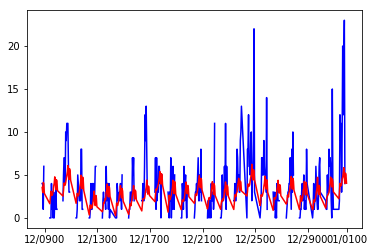

In [71]:
test_data.set_index('datetime',inplace=True)
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d%H'))
plt.plot(test_data["uri_su"],color='blue',label="sales")
plt.plot(lm_urisuu.predict(test_data),color='red',label="Predicted sales")